<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Pollution_dynamics03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
#connect the data to dataframe
path ='/content/drive/MyDrive/Colab Notebooks/Data for JER/activity2003_2020.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.head()

,Date,Conc
0,2003-01-01,22.0
1,2003-01-02,18.0
2,2003-01-03,22.0
3,2003-01-04,46.0
4,2003-01-05,23.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6487 entries, 0 to 6486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6487 non-null   datetime64[ns]
 1   Conc    6404 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 101.5 KB


In [ ]:
df['Week'] = df.Date.dt.isocalendar().week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Month,Year
0,2003-01-01,22.0,1,1,2003
1,2003-01-02,18.0,1,1,2003
2,2003-01-03,22.0,1,1,2003
3,2003-01-04,46.0,1,1,2003
4,2003-01-05,23.0,1,1,2003
...,...,...,...,...,...
6482,2020-12-27,12.0,52,12,2020
6483,2020-12-28,17.0,53,12,2020
6484,2020-12-29,10.0,53,12,2020
6485,2020-12-30,13.0,53,12,2020


In [ ]:
#Adding dictionary for manipulating with month numbers
m_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [ ]:
df1 = df.resample('M', on = 'Date').mean()
df1.dropna(inplace = True)
df1.reset_index('Date', inplace=True)
df1['Month'] = df1.Date.dt.month
df1['Mon'] = df1['Month'].replace(m_dict)
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Year'] = df1.Date.dt.year
df1['season'] = np.where(df1.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df1

,Date,Conc,Week,Month,Year,Mon,season
0,2003-01-31,19.200000,5,1,2003,Jan,win
1,2003-02-28,12.592593,9,2,2003,Feb,win
2,2003-03-31,17.333333,14,3,2003,Mar,win
3,2003-04-30,15.071429,18,4,2003,Apr,sum
4,2003-05-31,18.275862,22,5,2003,May,sum
...,...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,8,2020,Aug,sum
209,2020-09-30,19.200000,40,9,2020,Sep,sum
210,2020-10-31,21.612903,44,10,2020,Oct,win
211,2020-11-30,22.000000,49,11,2020,Nov,win


In [ ]:
df1.drop('Month', axis=1, inplace=True)
df1

,Date,Conc,Week,Year,Mon,season
0,2003-01-31,19.200000,5,2003,Jan,win
1,2003-02-28,12.592593,9,2003,Feb,win
2,2003-03-31,17.333333,14,2003,Mar,win
3,2003-04-30,15.071429,18,2003,Apr,sum
4,2003-05-31,18.275862,22,2003,May,sum
...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,2020,Aug,sum
209,2020-09-30,19.200000,40,2020,Sep,sum
210,2020-10-31,21.612903,44,2020,Oct,win
211,2020-11-30,22.000000,49,2020,Nov,win


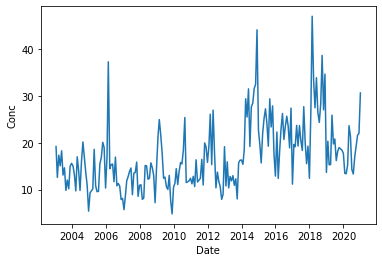

In [ ]:
sns.lineplot(data = df1, x = 'Date', y = 'Conc')

In [ ]:
df2 = df[df['Conc'] > 47]
df2.dropna(inplace = True)
df2['Mon'] = df2['Month'].replace(m_dict)
df2['season'] = np.where(df2.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df2.drop('Month',1, inplace=True)
df_sum = df2[df2['season'] == 'sum']
df_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,Date,Conc,Week,Year,Mon,season
604,2004-08-27,62.0,35,2004,Aug,sum
1163,2006-05-06,48.0,18,2006,May,sum
2715,2010-08-05,49.0,31,2010,Aug,sum
2716,2010-08-06,55.0,31,2010,Aug,sum
2727,2010-08-17,60.0,33,2010,Aug,sum
...,...,...,...,...,...,...
5654,2018-09-21,48.0,38,2018,Sep,sum
6223,2020-04-12,86.0,15,2020,Apr,sum
6227,2020-04-16,92.0,16,2020,Apr,sum
6228,2020-04-17,92.0,16,2020,Apr,sum


In [ ]:
df_win = df2[df2['season'] == 'win']
df_win

,Date,Conc,Week,Year,Mon,season
7,2003-01-08,63.0,2,2003,Jan,win
72,2003-03-14,55.0,11,2003,Mar,win
389,2004-01-25,73.0,4,2004,Jan,win
948,2005-10-03,71.0,40,2005,Oct,win
981,2005-11-05,65.0,44,2005,Nov,win
...,...,...,...,...,...,...
6460,2020-12-05,69.0,49,2020,Dec,win
6465,2020-12-10,62.0,50,2020,Dec,win
6467,2020-12-12,51.0,50,2020,Dec,win
6468,2020-12-13,56.0,50,2020,Dec,win


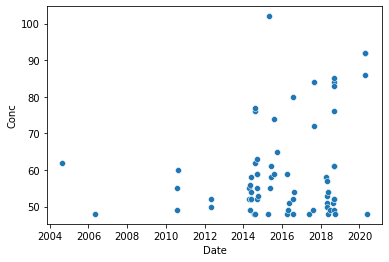

In [ ]:
sns.scatterplot(x='Date', y = 'Conc', data=df_sum)

In [ ]:
x = 'Date'
y = 'Conc'
fig, ax = plt.subplots(figsize = (18,8), dpi = 150)
sns.lineplot(x, y, data= df1)

In [ ]:
#example of datafraem indexing 
mi_fin['index'] = range(1, len(mi_fin)+1)
mi_fin

,Conc,Year,Mon,index
0,19.200000,2003,Jan,1
1,12.592593,2003,Feb,2
2,17.333333,2003,Mar,3
3,15.071429,2003,Apr,4
4,18.275862,2003,May,5
...,...,...,...,...
7,16.967742,2020,Aug,209
8,19.200000,2020,Sep,210
9,21.612903,2020,Oct,211
10,22.000000,2020,Nov,212


In [ ]:
#example of rank precentile calculation
mi_fin1['Rank'] = mi_fin1.Conc.rank()
mi_fin1['Rank_Pct'] = mi_fin1.Conc.rank(pct=True)
mi_fin1

,Conc,Year,Mon,Rank,Rank_Pct
10,4.793103,2009,Nov,1.0,0.004695
10,5.387097,2004,Dec,2.0,0.009390
0,5.709677,2007,Jan,3.0,0.014085
10,7.200000,2008,Nov,4.0,0.018779
9,7.612903,2009,Oct,5.0,0.023474
...,...,...,...,...,...
10,34.666667,2018,Nov,209.0,0.981221
1,37.304348,2006,Feb,210.0,0.985915
8,38.666667,2018,Sep,211.0,0.990610
10,44.133333,2014,Nov,212.0,0.995305
